Author: Abdullah Yasser Borai Ahmed Ismail
Platform: Kaggle Notebook
File Used: https://drive.google.com/file/d/1LbixIYNdHAxEpWwvHqXVXq_U4RCgQqqL/view?usp=sharing
This system was created to predict the likelihood of having a Heart Disease Based on some medical conditions using various methods
Models Used: Logistic Regression, K Neighbors, and Random Forests

In [34]:
# Importing the needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Using Inline matplotlib to directly view graphs inside this notebook
%matplotlib inline

# Importing Used Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Importing the libraries necessary for splitting data
from sklearn.model_selection import train_test_split

# Importing the libraries necessary for evaluating the System
from sklearn.metrics import confusion_matrix, classification_report


In [35]:
# creating a path for the data file
file_path = "/kaggle/input/heart-disease-data/HeartDisease.csv"

#loading the file into the program
data = pd.read_csv(file_path)

In [36]:
# checking if the data needs cleaning by looking at the null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


From the information above, the data has no null values and thus it doesn't need any cleaning

In [37]:
# checking the relationship between each variable and the other (age and heart disease for example)
disease_effect = data.corr()

# printing the relationship betweeen heart disease and all other factors
disease_effect.target

age        -0.225439
sex        -0.280937
cp          0.433798
trestbps   -0.144931
chol       -0.085239
fbs        -0.028046
restecg     0.137230
thalach     0.421741
exang      -0.436757
oldpeak    -0.430696
slope       0.345877
ca         -0.391724
thal       -0.344029
target      1.000000
Name: target, dtype: float64

Heart Disease can be positively affected by certain factors. For example, it seems like cp (Chest Pain Type) has a high effect on heart disease.
They both positively correlate with each other
We can demonestrate this by graphing the data of the two factors

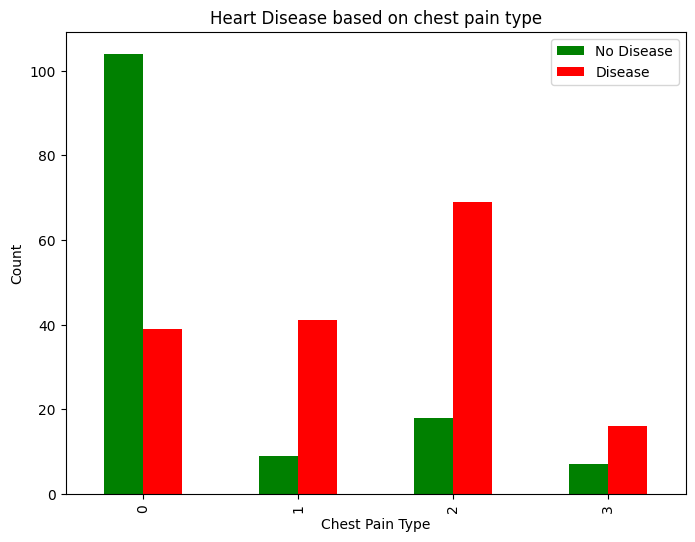

In [38]:
# descovering the relationship between the heart disease and chest pain type
pd.crosstab(data.cp, data.target).plot(kind = "bar", figsize =(8, 6), color = ["green", "red"])
plt.title("Heart Disease based on chest pain type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Count")
plt.legend(["No Disease", "Disease"])

It also seems like exang negatively correlate with it Heart Disease. Let's demonestrate this by graphing this relationship

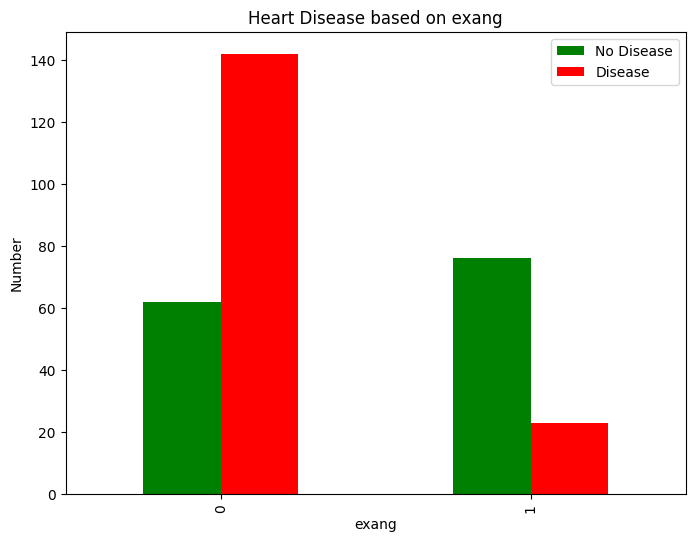

In [39]:
# descovering the relationship between the heart disease and exang
pd.crosstab(data.exang, data.target).plot(kind = "bar", figsize =(8, 6), color = ["green", "red"])
plt.title("Heart Disease based on exang")
plt.ylabel("Number")
plt.legend(["No Disease","Disease"])

It also seems like Heart Disease is connected to thalcah (Maximum heart rate) and age
Let's graph those relationships

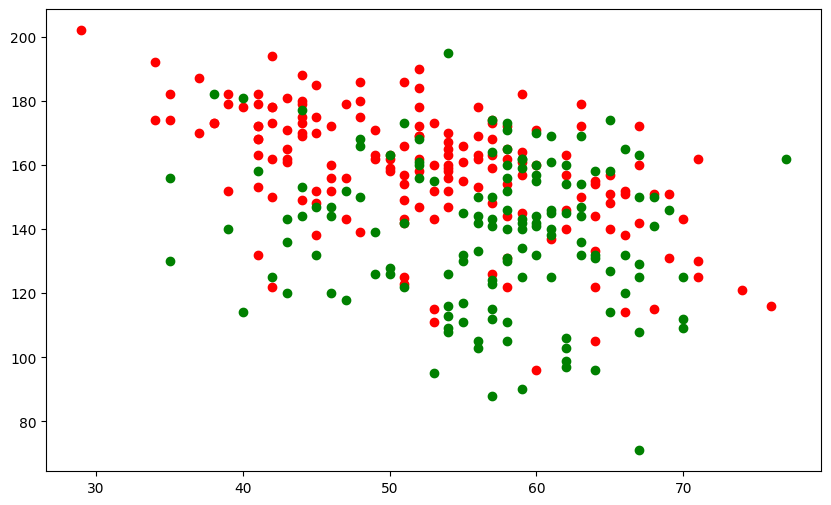

In [40]:
# new figure for plotting the relationship between heart disease and Maximum Heart Rate and Age
plt.figure(figsize=(10, 6))

# Scatter plot
# plotting the diseased people with the red color
plt.scatter(data.age[data.target==1], data.thalach[data.target==1], c = "red")

# plotting the undiseased people with the green color
plt.scatter(data.age[data.target==0], data.thalach[data.target==0], c = "green")

Now let's make our models

In [41]:
# splitting data into X and y
# X is simply everything except target column
X = data.drop("target", axis = 1)
# y is the last column "target"
y = data.target

# choosing a certain seed for our random generator to choose the same data each time
np.random.seed(44)
# splitting data into Training and Testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [42]:
# creating an array for our models
# 0- Logistic Reg
# 1- KNeighbors
# 2- Random Forest
training_models = np.array([["Logistic Regression", LogisticRegression(solver='lbfgs', max_iter=10000)], ["KNN", KNeighborsClassifier()], ["Random Forest", RandomForestClassifier()]])

def fit_and_score(training_models, X_train, X_test, y_train, y_test):
    np.random.seed(44)
    model_scores = {}
    for model in training_models:
        # a variable to hold the name of the model
        model_name = model[0]
        # a variable to hold the model itself
        classifier = model[1]
        
        # fitting the model
        classifier.fit(X_train, y_train)
        # evaluating the model
        classifier_score = classifier.score(X_test, y_test)
        
        # adding the score of the model to the dictionary with its name as index
        model_scores[model_name] = classifier_score
    
    # returning the scores of each model as a dictionary
    return model_scores

In [43]:
model_scores = fit_and_score(training_models, X_train, X_test, y_train, y_test)
model_scores

{'Logistic Regression': 0.8360655737704918,
 'KNN': 0.639344262295082,
 'Random Forest': 0.819672131147541}

<Axes: >

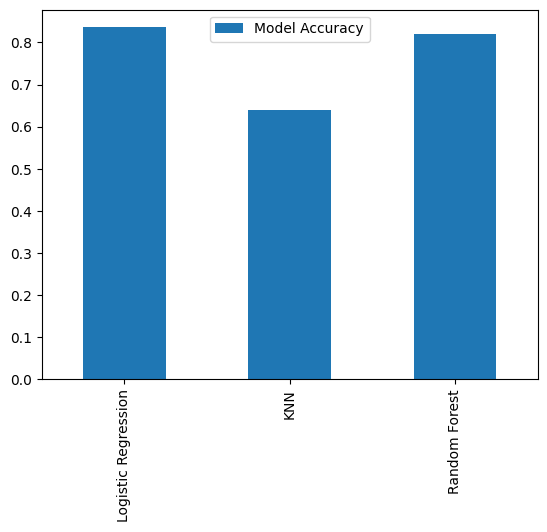

In [44]:
# comparing the scores of each model by a histogram graph
model_comparison = pd.DataFrame(model_scores, index=["Model Accuracy"])
model_comparison.T.plot.bar()

In [45]:
# Evaluating the quality of each model
np.random.seed(44)

for model in training_models:
        # a variable to hold the name of the model
        model_name = model[0]
        # a variable to hold the model itself
        classifier = model[1]
        
        # fitting the model
        classifier.fit(X_train, y_train)
        
        # predicting the output using test data
        y_predict = classifier.predict(X_test)
        
        # comparing it with the true values "y_test" and printing the result
        print(model_name)
        print(classification_report(y_test, y_predict))
        print("---------------------------------")
        
        

Logistic Regression
              precision    recall  f1-score   support

           0       0.85      0.79      0.81        28
           1       0.83      0.88      0.85        33

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61

---------------------------------
KNN
              precision    recall  f1-score   support

           0       0.64      0.50      0.56        28
           1       0.64      0.76      0.69        33

    accuracy                           0.64        61
   macro avg       0.64      0.63      0.63        61
weighted avg       0.64      0.64      0.63        61

---------------------------------
Random Forest
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        28
           1       0.82      0.85      0.84        33

    accuracy                           0.82        61
   macro avg       0.8